In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

### Load Dataset

In [3]:
df=pd.read_csv('Churn_Modelling.csv')

In [4]:
df.head()

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,2,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,3,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,4,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,5,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


### Uni - Variate Analysis

[Text(0, 0, '4543'), Text(0, 0, '5457')]

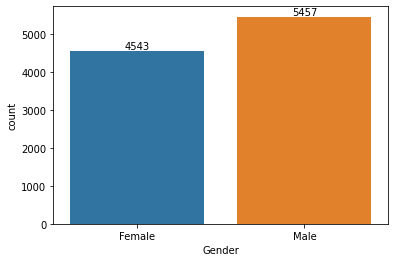

In [5]:
ct=sns.countplot(x='Gender',data=df)
ct.bar_label(ct.containers[0])

<AxesSubplot:xlabel='Geography', ylabel='count'>

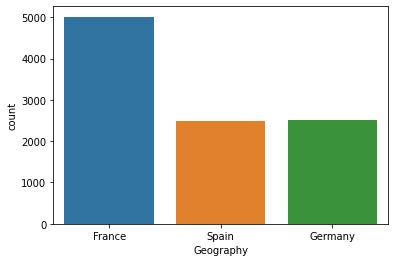

In [6]:
sns.countplot(data=df,x='Geography')

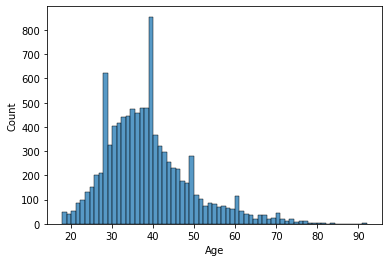

In [7]:
sns.histplot(data=df,x='Age');

### Bi - Variate Analysis

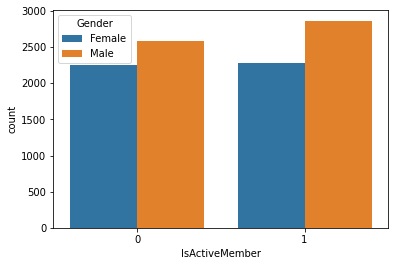

In [8]:
ct=sns.countplot(x='IsActiveMember',data=df,hue='Gender')

<AxesSubplot:xlabel='Age', ylabel='EstimatedSalary'>

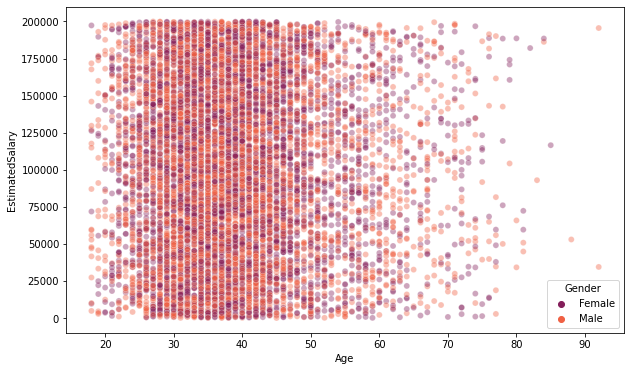

In [9]:
plt.figure(figsize=(10,6))
sns.scatterplot(x='Age',y='EstimatedSalary',data=df,hue='Gender',alpha=0.4,palette="rocket")

<AxesSubplot:xlabel='CreditScore', ylabel='EstimatedSalary'>

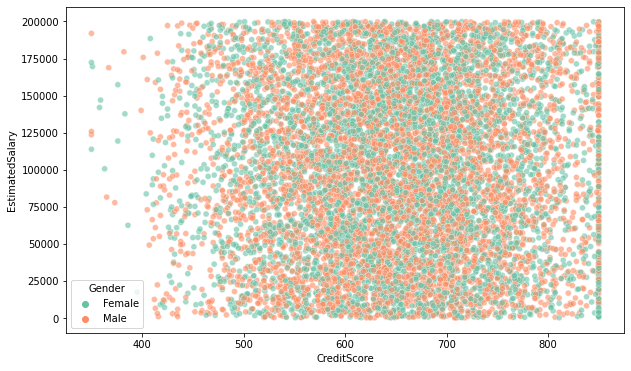

In [10]:
plt.figure(figsize=(10,6))
sns.scatterplot(x='CreditScore',y='EstimatedSalary',data=df,hue='Gender',alpha=0.6,palette="Set2")

### Multi - Variate Analysis

<AxesSubplot:>

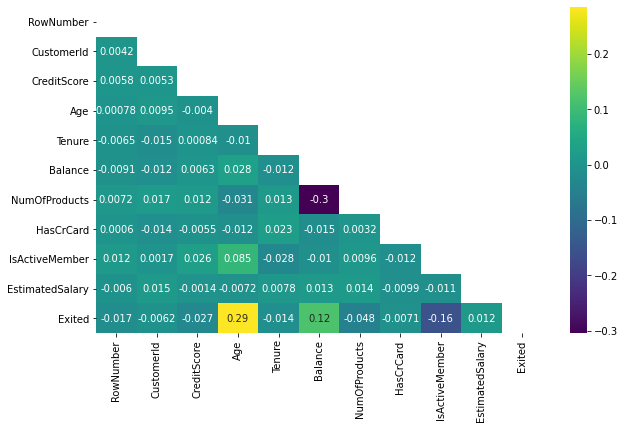

In [11]:
plt.figure(figsize=(10,6))
corr=df.corr()
mat=np.triu(corr)
sns.heatmap(corr,annot=True,cmap='viridis',mask=mat)

### Descriptive Statistics

In [12]:
df.describe()

,RowNumber,CustomerId,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
count,10000.00000,1.000000e+04,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.00000,10000.000000,10000.000000,10000.000000
mean,5000.50000,1.569094e+07,650.528800,38.921800,5.012800,76485.889288,1.530200,0.70550,0.515100,100090.239881,0.203700
std,2886.89568,7.193619e+04,96.653299,10.487806,2.892174,62397.405202,0.581654,0.45584,0.499797,57510.492818,0.402769
min,1.00000,1.556570e+07,350.000000,18.000000,0.000000,0.000000,1.000000,0.00000,0.000000,11.580000,0.000000
25%,2500.75000,1.562853e+07,584.000000,32.000000,3.000000,0.000000,1.000000,0.00000,0.000000,51002.110000,0.000000
50%,5000.50000,1.569074e+07,652.000000,37.000000,5.000000,97198.540000,1.000000,1.00000,1.000000,100193.915000,0.000000
75%,7500.25000,1.575323e+07,718.000000,44.000000,7.000000,127644.240000,2.000000,1.00000,1.000000,149388.247500,0.000000
max,10000.00000,1.581569e+07,850.000000,92.000000,10.000000,250898.090000,4.000000,1.00000,1.000000,199992.480000,1.000000


In [13]:
df.head()

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,2,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,3,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,4,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,5,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


In [14]:
print("Mean Salary :",df['EstimatedSalary'].mean(),'\n')

print("Most Credit Score:",df.iloc[df['CreditScore'].argmax()]['Surname'],df.iloc[df['CreditScore'].argmax()]['CreditScore'],'\n')

print("Count of Customers with CreditCard and IsActiveMember :",len(df[(df['HasCrCard']==1) &(df['IsActiveMember']==1)]),'\n')

print("Max Number of Products :",df['NumOfProducts'].max(),'\n')

print("Number of customers with ZERO Balance :",df[df['Balance']==0].shape[0])

Mean Salary : 100090.2398809998 

Most Credit Score: Mitchell 850 

Count of Customers with CreditCard and IsActiveMember : 3607 

Max Number of Products : 4 

Number of customers with ZERO Balance : 3617


### Missing Data

In [15]:
df.isna().sum()

RowNumber          0
CustomerId         0
Surname            0
CreditScore        0
Geography          0
Gender             0
Age                0
Tenure             0
Balance            0
NumOfProducts      0
HasCrCard          0
IsActiveMember     0
EstimatedSalary    0
Exited             0
dtype: int64

- There is no null data in the dataset

### Outliers can be only found in Continous data 
- So checking for all continous data

In [16]:
contious_data=['CreditScore','Balance','EstimatedSalary']

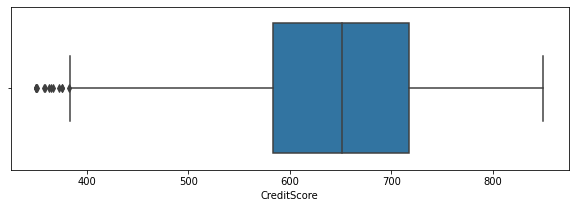

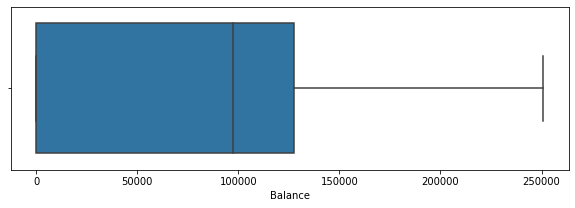

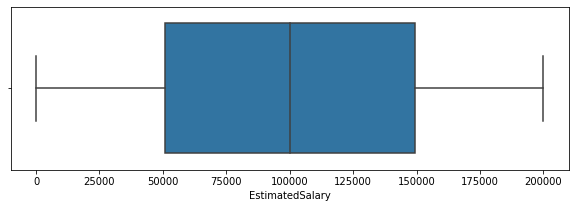

In [17]:
for i in contious_data:
    plt.figure(figsize=(10,3))
    sns.boxplot(x=df[i])

In [18]:
des=df['CreditScore'].describe()

In [19]:
per_25=des['25%']
per_75=des['75%']
IQR=per_75-per_25
minimum=per_25-(1.5*IQR)

### Therefore the outliers for CreditScore at Minimum starts at 383

In [20]:
minimum

383.0

### Dropping rows that are less than 383

In [21]:
df.drop(df[df['CreditScore']<383].index,axis=0,inplace=True)

### We can also remove columns like RowNumber CustomerId Surname are not usefull

In [22]:
df.drop(['RowNumber','CustomerId','Surname'],axis=1,inplace=True)

###  Columns needed to be encoded are Geography,Gender

In [23]:
df.shape

(9985, 11)

In [24]:
final_df=pd.get_dummies(df,drop_first=True)

### Splitting Dependent and Independent Variable

In [34]:
X=final_df.drop('Exited',axis=1) #Independent Variable
y=final_df['Exited'] # Dependant Variable

### Scale the Independent Variable

In [35]:
from sklearn.preprocessing import StandardScaler

In [36]:
scaler=StandardScaler()

In [37]:
X=scaler.fit_transform(X)

In [40]:
X[:5]

array([[-0.3327168 ,  0.29415845, -1.04249411, -1.2256629 , -0.91274609,
         0.64646813,  0.96951794,  0.02287506, -0.57869945, -0.57361109,
        -1.09625   ],
       [-0.44721972,  0.19880191, -1.38835263,  0.11758591, -0.91274609,
        -1.54686666,  0.96951794,  0.21749226, -0.57869945,  1.74334147,
        -1.09625   ],
       [-1.55061149,  0.29415845,  1.03265698,  1.3333355 ,  2.53031008,
         0.64646813, -1.03144043,  0.24164167, -0.57869945, -0.57361109,
        -1.09625   ],
       [ 0.5000317 ,  0.00808883, -1.38835263, -1.2256629 ,  0.808782  ,
        -1.54686666, -1.03144043, -0.10790915, -0.57869945, -0.57361109,
        -1.09625   ],
       [ 2.07184449,  0.389515  , -1.04249411,  0.78598922, -0.91274609,
         0.64646813,  0.96951794, -0.36422742, -0.57869945,  1.74334147,
        -1.09625   ]])

### Split the data into training and testing

In [41]:
from sklearn.model_selection import train_test_split

In [42]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42)